In [1]:
#1import different libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import models,layers
import matplotlib.pyplot as plt

In [2]:
#1.Load Data
ccard_data = pd.read_csv("C:\\Users\\hina\\Downloads\\archive(6)\\creditcard.csv")
ccard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#2.Check Missing Values 
ccard_data.isnull().any()
ccard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
ccard_data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

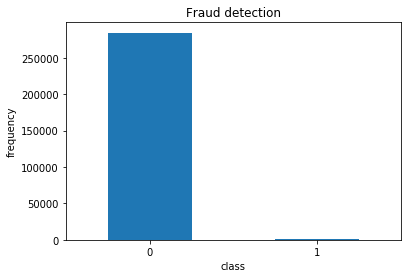

In [5]:
#Plotting for fraud(1) and not fraud(0)
fraud = pd.value_counts(ccard_data["Class"])
fraud.plot(kind="bar",rot=0)
plt.title("Fraud detection")
plt.xticks(range(2))
plt.xlabel("class")
plt.ylabel("frequency")
plt.show

In [7]:
ccard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
ccard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
#split ccard data into features and dependend variables
dependent = ccard_data["Class"]
features = ccard_data.drop(["Class"],axis=1)
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [12]:
dependent.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [13]:
#4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
train_features,test_features,train_dependent,test_dependent = train_test_split(features,dependent,test_size=0.3,random_state=0)

In [14]:
#3.Standardized the Input Variables.
mean = train_features.mean(axis=0)
train_features -= mean
std = train_features.std(axis=0)
train_features /= std
test_features -= mean
test_features /= std

In [15]:
train_features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,0.402559,-0.067419,0.066209,-0.427935,-0.703356,1.326638,1.310292,0.405966,0.523778,0.015398,...,-0.081846,-0.084033,0.007304,0.400189,-4.075964,-1.707842,0.700554,0.764063,0.230266,-0.165692
204520,0.853045,1.082568,0.010195,-0.997701,0.080656,0.438361,-0.250645,0.163259,-0.216419,0.348359,...,-0.112308,-0.443007,-1.083151,0.425956,0.108640,-0.261293,0.423241,-0.170159,-0.177599,-0.352238
182659,0.646287,-0.044312,0.101926,1.038203,0.484459,0.163546,0.830013,1.285432,-0.904557,0.692976,...,0.068198,0.020632,1.461860,-0.652604,1.193398,-0.330269,-1.273131,-2.996057,-3.509157,0.330885
25117,-1.290099,0.688560,-0.321166,0.367026,-0.444611,-0.834835,-0.641811,-0.523042,-0.025306,-0.594085,...,-0.087169,-0.019907,-0.247870,0.283511,0.573862,0.290526,-0.839002,0.034342,0.049675,-0.336066
227642,1.060056,-0.777709,0.392470,0.406749,-0.396457,0.612565,-0.386883,0.803572,-0.078732,-0.057029,...,-0.095765,-0.297960,-0.540300,-0.341307,0.971563,1.303019,1.076136,0.162199,0.453376,0.005211


In [16]:
test_features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,0.653087,-0.164828,0.639652,-0.030862,-0.428981,0.921513,-0.068904,0.946129,-0.100924,-0.158665,...,0.241451,-0.278545,-0.596280,-0.415413,-0.077669,0.405079,0.017415,0.270598,0.495996,-0.197751
255448,1.314436,-0.178265,0.564330,0.095287,-0.464169,0.855732,-0.551798,0.824502,-0.056988,-0.274309,...,-0.125844,-0.365220,-1.145077,-0.047845,0.808978,-0.777494,0.279021,0.191643,0.540395,-0.352238
244749,1.214141,-0.822501,-1.450411,0.216076,0.469114,1.732071,-1.336037,-0.928354,0.273756,0.819949,...,0.544500,0.943456,1.559198,1.534325,1.058354,-3.458323,-2.160497,0.713920,1.346184,0.029794
63919,-0.923635,-1.261742,0.520884,0.951650,0.741141,-1.355350,1.564413,0.417365,-0.199135,-0.236750,...,-1.282973,1.090082,0.951407,0.239021,-0.431423,0.009186,-0.368902,-1.271772,-2.033400,0.891215
11475,-1.576858,0.681681,-0.328576,0.487185,-0.150376,-0.809900,-0.395533,-0.652954,-0.050887,0.904759,...,-0.165271,-0.187534,-0.102658,0.106991,0.549746,0.726612,-0.557469,-0.006838,0.010024,-0.339967


In [17]:
#5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
#6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
model = models.Sequential()
model.add(layers.Dense(10,activation="relu",input_shape=(train_features.shape[1],)))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(6,activation="relu"))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="rmsprop",loss = "binary_crossentropy",metrics = ['accuracy'])

In [18]:
#7.Train the Model with Epochs (100).
#8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
history = model.fit(train_features,train_dependent, batch_size=128, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
1247/1247 [==============================] - 3s 2ms/step - loss: 0.1583 - accuracy: 0.9716 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 2/100
1247/1247 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 3/100
1247/1247 [==============================] - 2s 1ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 4/100
1247/1247 [==============================] - 2s 1ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 6/100
1247/1247 [==============================] - 2s 1ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/100
1247/1247 [==============================] - 2s 1ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0040 - val_ac

In [20]:
#9.Prediction should be > 92%
#10.Evaluation Step
loss,acc = model.evaluate(test_features,test_dependent)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0057 - accuracy: 0.9994


In [23]:
#11.Prediction 
pred = model.predict(test_features)
pred[:10]

array([[1.2832880e-04],
       [1.0267628e-04],
       [3.1044857e-07],
       [1.7898882e-06],
       [7.1321911e-06],
       [1.6957521e-04],
       [1.8620227e-07],
       [6.5022132e-06],
       [2.0447169e-06],
       [2.2013355e-06]], dtype=float32)

In [24]:
pred = np.round(pred)
pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)